# ECON441B-Intro to ML Lab-Week5

## Weiqi Xia

## Github Repository Link: 


# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)

In [2]:
df = pd.read_csv("fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/xb/y0qzjbtj2_307tghsqcjt6jh0000gn/T/ipykernel_75854/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/xb/y0qzjbtj2_307tghsqcjt6jh0000gn/T/ipykernel_75854/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [8]:
X_train_df = X_train
X_test_df = X_test
X_holdout_df = X_holdout

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [11]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

In [12]:
len(y_train)

389003

In [13]:
sum(y_train ==1)

1479

In [14]:
sum(y_train ==0)

387524

In [15]:
len(over_y)

775048

In [16]:
len(under_y)

2958

In [17]:
len(smote_y)

775048

# 3.) Train three logistic regression models

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [20]:
over_log.score(X_test, y_test)

0.9366467525612419

In [21]:
under_log.score(X_test, y_test)

0.930576549341395

In [22]:
smote_log.score(X_test, y_test)

0.9361309052520453

In [24]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [25]:
# Sensitivity here in credit fraud is more important as seen from last class

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
y_true = y_test

In [25]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77843,  5190],
       [   91,   234]])

In [26]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.72


In [27]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77334,  5699],
       [   88,   237]])

In [28]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7292307692307692


In [29]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77800,  5233],
       [   91,   234]])

In [30]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.72


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [31]:
raw_temp = pd.concat([X_train_df, y_train], axis =1)

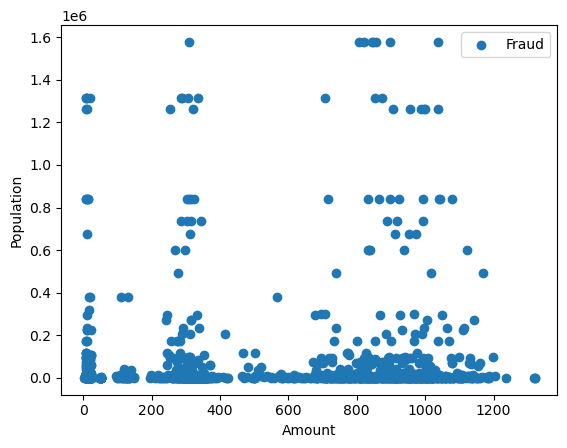

In [32]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [33]:
smote_X_df, smote_y = smote.fit_resample(X_train_df,y_train)
raw_temp = pd.concat([smote_X_df, smote_y], axis =1)

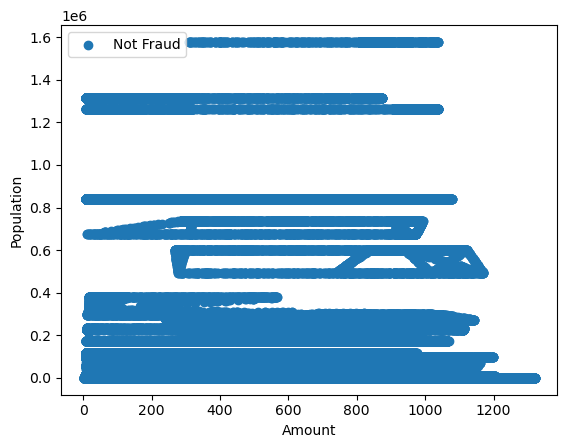

In [34]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [36]:
resampling_methods = {
    "over": RandomOverSampler(),
    "under":RandomUnderSampler(),
    "smote": SMOTE()
}

model_configs ={
    "LOG": LogisticRegression(),
    "LASSO": LogisticRegression(penalty = "l1", solver = "liblinear", C = .5),
    "DecisionTree": DecisionTreeClassifier()
}

In [37]:
trained_models = {}
results = []

In [38]:
def calc_perf_metric(y_true,y_pred):
    tn,fp,fn,tp = confusion_matrix(y_true,y_pred).ravel()
    
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    
    return(sensitivity, specificity, precision, recall, f1)

In [39]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train,y_train)
    
    for model_name, model in model_configs.items():
        
        combined_key = f"{resample_key}_{model_name}"
        m = model.fit(resample_X,resample_y)
        trained_models[combined_key] = m
        y_pred=m.predict(X_test)
        sensitivity,specificity,precision,recall,f1=calc_perf_metric(y_test,y_pred)
        results.append({"Model":combined_key,
                       "Sensitivity":sensitivity,
                       "Specificity":specificity,
                       "Precision":precision,
                       "Recall":recall,
                       "F1":f1})

In [40]:
results_df = pd.DataFrame(results)
results_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.720000,0.937904,0.043414,0.720000,0.081890
1,over_LASSO,0.720000,0.937856,0.043382,0.720000,0.081832
2,over_DecisionTree,0.572308,0.998326,0.572308,0.572308,0.572308
3,under_LOG,0.723077,0.941373,0.046051,0.723077,0.086588
4,under_LASSO,0.723077,0.942673,0.047047,0.723077,0.088346
5,under_DecisionTree,0.935385,0.944600,0.061990,0.935385,0.116275
6,smote_LOG,0.720000,0.936543,0.042522,0.720000,0.080302
7,smote_LASSO,0.720000,0.936616,0.042569,0.720000,0.080385
8,smote_DecisionTree,0.695385,0.993171,0.284994,0.695385,0.404293
